In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [17]:
# Define the base URL for the Census API (ACS 5-year estimates) and API key
URL = "https://api.census.gov/data"
api_key = "API_key"

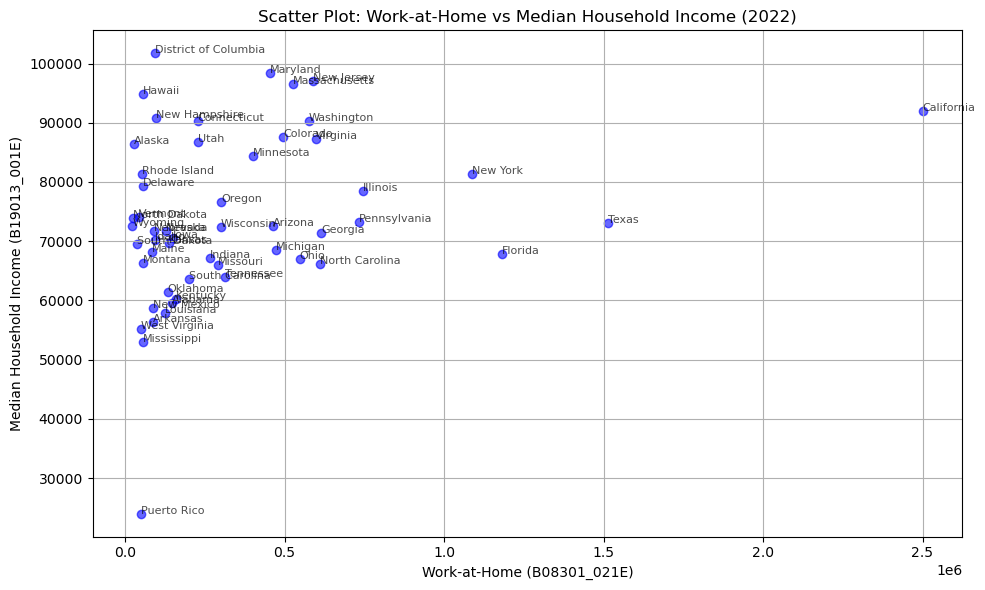

In [29]:
# Year to look at
year = 2022

# Empty list to hold data for the year 2022
all_data = []

# Loop through each year (just one year in this case)
params = {
    'get': 'NAME,B08301_021E,B19013_001E',  # Request columns: State, Work-at-home, Median Household Income
    'for': 'state:*',  # Data for all states
    'key': api_key
}

# Send the request to the Census API
response = requests.get(f"{URL}/{year}/acs/acs5", params=params)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract columns and rows of data
    columns, *rows = data  # This will unpack the first element as columns and the rest as rows

    # Create DataFrame directly using the extracted columns and rows
    df = pd.DataFrame(rows, columns=columns)

    # Convert income and work-at-home data to numeric
    df['B19013_001E'] = pd.to_numeric(df['B19013_001E'], errors='coerce')  # Median Household Income
    df['B08301_021E'] = pd.to_numeric(df['B08301_021E'], errors='coerce')  # Work-at-home data

    # Assign state names to a separate column
    df['State'] = df['NAME']

    # Drop the 'NAME' column (no longer needed)
    df.drop(columns=['NAME'], inplace=True)

    # Append the data for this year to the all_data list
    all_data.append(df)

# Create the scatter plot
    # Plot Work-at-home vs Median Household Income
    plt.figure(figsize=(10, 6))
    plt.scatter(df['B08301_021E'], df['B19013_001E'], color='blue', alpha=0.6)

    # Customize the plot
    plt.title(f'Scatter Plot: Work-at-Home vs Median Household Income ({year})')
    plt.xlabel('Work-at-Home (B08301_021E)')
    plt.ylabel('Median Household Income (B19013_001E)')
    plt.grid(True)

    # Optionally: Annotate each point with the state name
    for i, state in enumerate(df['State']):
        plt.annotate(state, (df['B08301_021E'].iloc[i], df['B19013_001E'].iloc[i]), fontsize=8, alpha=0.7)

    # Show the plot
    plt.tight_layout()  # Ensures that the plot is neatly arranged
    plt.show()
else:
    print("Failed to retrieve data")